<a href="https://colab.research.google.com/github/Rajeeb321123/Mathmatical-Foundation-for-Machine-Learning/blob/master/regression_in_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression in PyTorch

In this notebook, we use the PyTorch **automatic differentiation** library to fit a straight line to data points. Thus, here we use calculus to solve the same regression problem that we used the Moore-Penrose Pseudoinverse to solve in the [*Linear Algebra II* notebook](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/2-linear-algebra-ii.ipynb).

In [198]:
import torch
import matplotlib.pyplot as plt

In [199]:
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.]) # E.g.: Dosage of drug for treating Alzheimer's disease
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

The $y$ values were created using the equation of a line $y = mx + b$. This way, we know what the model parameters to be learned are, say, $m = -0.5$ and $b = 2$. Random, normally-distributed noise has been added to simulate sampling error:

In [200]:
mean=torch.zeros(8)
print(f"mean: {mean}")
temp = torch.normal(mean=torch.zeros(8), std=0.2)
print(f"temp: {temp}")

mean: tensor([0., 0., 0., 0., 0., 0., 0., 0.])
temp: tensor([-0.2586,  0.1531, -0.0398,  0.3694, -0.0820,  0.0045, -0.1350, -0.3279])


In [201]:
y = -0.5*x + 2 + torch.normal(mean=torch.zeros(8), std=0.2) # random distrubuted noises are added to end, for simulating real world. std mean standard deviation, more std : larger noise
y

tensor([ 1.9872,  1.6877,  1.2341,  0.8941,  0.3140, -0.0702, -1.0314, -1.2960])

For reproducibility of this demo, here's a fixed example of $y$ values obtained by running the commented-out line above:

In [202]:
# for simialar value like in video we predefine the value
y = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37]) # E.g.: Patient's "forgetfulness score"
y

tensor([ 1.8600,  1.3100,  0.6200,  0.3300,  0.0900, -0.6700, -1.2300, -1.3700])

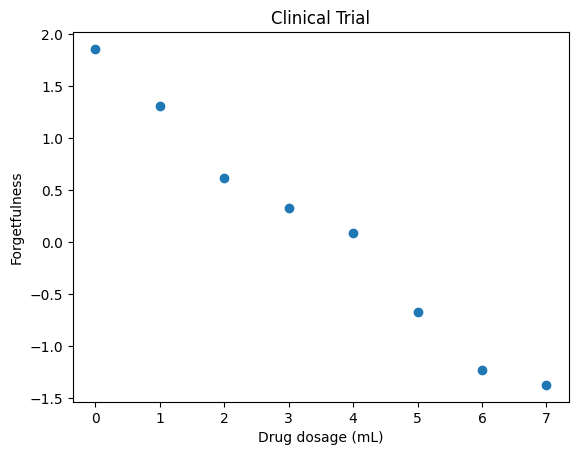

In [203]:
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
_ = ax.scatter(x, y)

Initialize the slope parameter $m$ with a "random" value of 0.9...

(**N.B.**: In this simple demo, we could guess approximately-correct parameter values to start with. Or, we could use an algebraic (e.g., Moore-Penrose pseudoinverse) or statistical (e.g., ordinary-least-squares regression) to solve for the parameters quickly. This tiny machine learning demo with two parameters and eight data points scales, however, to millions of parameters and millions of data points. The other approaches -- guessing, algebra, statistics -- do not come close to scaling in this way.)

In [204]:
m = torch.tensor([0.9]).requires_grad_() # requires_grad is Auto diff look at previous notebook. 0.9 in random value. m from y = mx + b
m

tensor([0.9000], requires_grad=True)

...and do the same for the $y$-intercept parameter $b$:

In [205]:
b = torch.tensor([0.1]).requires_grad_() # b  from y = mx + b
b

tensor([0.1000], requires_grad=True)

In [206]:
def regression(my_x, my_m, my_b): # y = mx + b
    return my_m*my_x + my_b

In [207]:
def regression_plot(my_x, my_y, my_m, my_b):

    fig, ax = plt.subplots()

    ax.scatter(my_x, my_y)

    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item() # detach().item() helps to get only value from tensor([0.1000], grad_fn=<AddBackward0>) i.e 0.10000000149011612
    y_max = regression(x_max, my_m, my_b).detach().item()

    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

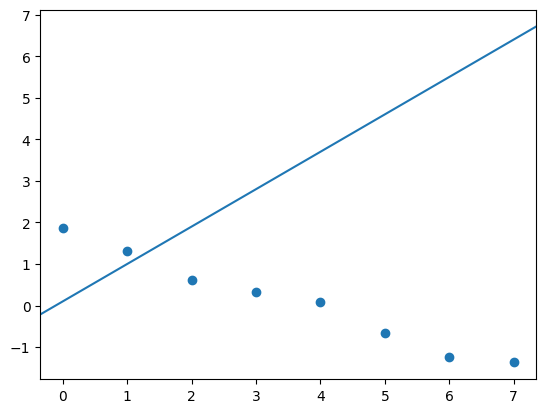

In [208]:
regression_plot(x, y, m, b)

**Return to slides here if following *Calculus I* class.**

### Machine Learning
In four easy steps :)

**Step 1**: Forward pass

In [209]:
yhat = regression(x, m, b) # initial random value. Value are very bad initially
yhat

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

In [210]:
y

tensor([ 1.8600,  1.3100,  0.6200,  0.3300,  0.0900, -0.6700, -1.2300, -1.3700])

**Step 2**: Compare $\hat{y}$ with true $y$ to calculate cost $C$

There is a PyTorch `MSELoss` method, but let's define it outselves to see how it works. MSE cost is defined by: $$C = \frac{1}{n} \sum_{i=1}^n (\hat{y_i}-y_i)^2 $$

`MSELoss` is good beacuse it exponentially increase if difference in yhat and y is large but if difference is small, cost will be ignorable.

In [211]:
def mse(my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [212]:
C = mse(yhat, y)
C

tensor(19.6755, grad_fn=<DivBackward0>)

**Step 3**: Use autodiff to calculate gradient of $C$ w.r.t. parameters

In [213]:
C.backward() # Cost(C) to yhat and continuously go backward to  m , b

In [214]:
m.grad # ask to slope attribute in m
# seems like positiv slope. dc/dm = 36
# so as it is positive slope, we can reduce parameter m, C will also decrease
# as m.grad=36 is larger than b.grad=6, changes in m will have more impact on Value of C

tensor([36.3050])

In [215]:
b.grad # dC/db
# positive slop

tensor([6.2650])

**Step 4**: Gradient descent

In [216]:
optimizer = torch.optim.SGD([m, b], lr=0.01)

In [217]:
optimizer.step() # perform a single step only. look at m and b , now they are adjusted for 1 step and their value are different now. Check them out.

Confirm parameters have been adjusted sensibly:

In [218]:
m # .9 TO .5360

tensor([0.5369], requires_grad=True)

In [219]:
b # .1 TO  .0.0374

tensor([0.0374], requires_grad=True)

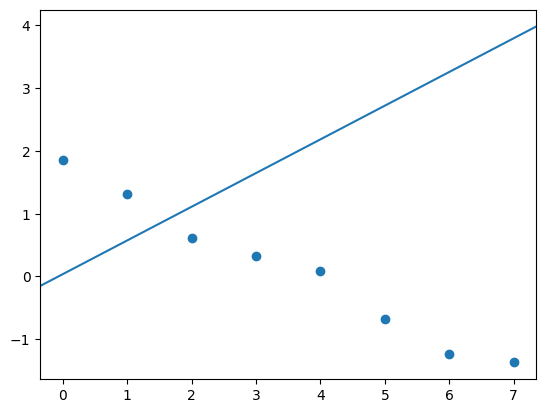

In [220]:
regression_plot(x, y, m, b) # still bad but slope is less steeper

We can repeat steps 1 and 2 to confirm cost has decreased:

In [221]:
C = mse(regression(x, m, b), y) # calculate the cost. looks like cost decrease from 19 to 8.5 is just one step
C

tensor(8.5722, grad_fn=<DivBackward0>)

Put the 4 steps in a loop to iteratively minimize cost toward zero:

In [222]:
# in a loop: just the above steps in a loop
epochs = 1000
for epoch in range(epochs):

    optimizer.zero_grad() # Reset gradients to zero; else they accumulate in memory

    yhat = regression(x, m, b) # Step 1
    C = mse(yhat, y) # Step 2

    C.backward() # Step 3
    optimizer.step() # Step 4 # means single step

    print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

Epoch 0, cost 8.57, m grad 23.2, b grad 3.6
Epoch 1, cost 4.08, m grad 14.8, b grad 1.91
Epoch 2, cost 2.25, m grad 9.49, b grad 0.831
Epoch 3, cost 1.51, m grad 6.11, b grad 0.15
Epoch 4, cost 1.2, m grad 3.96, b grad -0.28
Epoch 5, cost 1.07, m grad 2.59, b grad -0.552
Epoch 6, cost 1.01, m grad 1.72, b grad -0.723
Epoch 7, cost 0.981, m grad 1.17, b grad -0.829
Epoch 8, cost 0.962, m grad 0.82, b grad -0.894
Epoch 9, cost 0.948, m grad 0.595, b grad -0.934
Epoch 10, cost 0.936, m grad 0.452, b grad -0.957
Epoch 11, cost 0.925, m grad 0.361, b grad -0.969
Epoch 12, cost 0.915, m grad 0.302, b grad -0.975
Epoch 13, cost 0.904, m grad 0.265, b grad -0.977
Epoch 14, cost 0.894, m grad 0.241, b grad -0.976
Epoch 15, cost 0.884, m grad 0.225, b grad -0.973
Epoch 16, cost 0.874, m grad 0.214, b grad -0.969
Epoch 17, cost 0.864, m grad 0.207, b grad -0.965
Epoch 18, cost 0.854, m grad 0.202, b grad -0.96
Epoch 19, cost 0.845, m grad 0.199, b grad -0.955
Epoch 20, cost 0.835, m grad 0.196, b

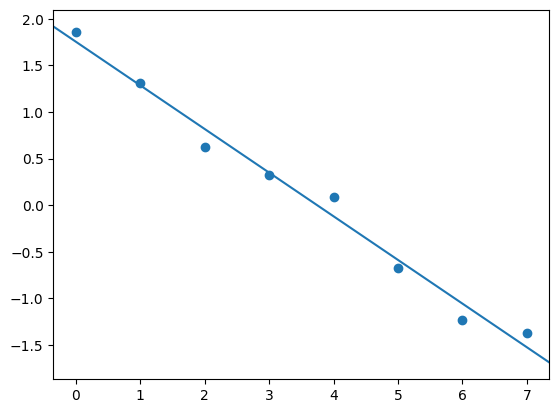

In [223]:
regression_plot(x, y, m, b) # looks like our cost is negelible 0.0195

In [224]:
m.item()

-0.4681258499622345

In [225]:
b.item()

1.7542961835861206

**N.B.**: The model doesn't perfectly approximate the slope (-0.5) and $y$-intercept (2.0) used to simulate the outcomes $y$ at the top of this notebook. This reflects the imperfectness of the sample of eight data points due to adding random noise during the simulation step. In the real world, the best solution would be to sample additional data points: The more data we sample, the more accurate our estimates of the true underlying parameters will be.

## ⚒️ Exercise: Use TensorFlow

$$y = x^2+2x+2$$

In [226]:
# Let's find slope m at x = 2
import tensorflow as tf

x = tf.Variable(2.)

with tf.GradientTape() as t:
  t.watch(x)
  y = x**2 + 2*x + 2

t.gradient(y, x)

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [227]:
# Now just use regression
x = tf.Variable([0, 1, 2, 3, 4, 5, 6, 7.]) # E.g.: Dosage of drug for treating Alzheimer's disease
x

<tf.Variable 'Variable:0' shape=(8,) dtype=float32, numpy=array([0., 1., 2., 3., 4., 5., 6., 7.], dtype=float32)>

In [228]:
y = x**2 + 2*x + 2 +  tf.random.normal(shape=(8,), mean=0.0, stddev=0.2, dtype=tf.float32)# random distrubuted noises are added to end, for simulating real world. std mean standard deviation, more std : larger noise
y

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([ 2.019222,  4.923533,  9.958991, 17.336561, 25.913593, 36.999958,
       50.268677, 64.9979  ], dtype=float32)>

In [229]:
m = tf.Variable( tf.constant(1, dtype=tf.float32), trainable=True) # trainable = true enable gradient tracking
m

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>

In [230]:
b = tf.Variable( tf.constant(3, dtype=tf.float32), trainable=True) # trainable = true enable gradient tracking
b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

In [231]:
def regression(my_x, my_m, my_b): # y = mx + b
    return my_m*my_x + my_b

In [232]:
def regression_plot(my_x, my_y, my_m, my_b):

    fig, ax = plt.subplots()

    ax.scatter(my_x, my_y)

    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b)
    print(f"ymin: {y_min}")
    y_max = regression(x_max, my_m, my_b)

    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

ymin: 2.6500000953674316


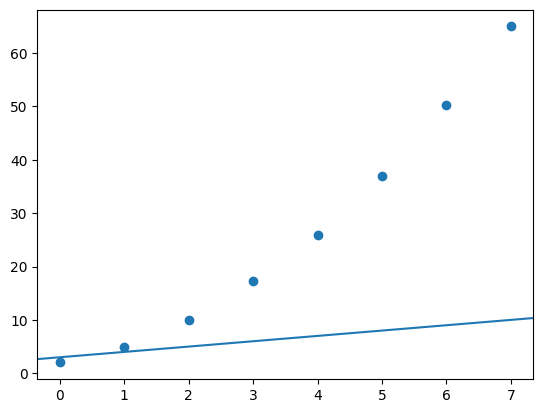

In [233]:
regression_plot(x, y, m, b)

In [234]:
def mse(my_yhat, my_y):
    sigma = tf.reduce_sum(tf.square(my_yhat - my_y))
    return sigma/len(my_y)

In [235]:
C = (tf.reduce_sum(tf.square((m*x + b) - y)))/len(y)
C

<tf.Tensor: shape=(), dtype=float32, numpy=760.1898>

In [236]:
optimizer=tf.keras.optimizers.experimental.SGD(learning_rate=0.01)

In [237]:
# in a loop: just the above steps in a loop
# very hard in tensorflow, m and b must be inside gradient tape() to be watched
epochs = 1000
for epoch in range(epochs):

    yhat = regression(x, m, b) # Step 1

    with tf.GradientTape() as t:
      # to watch m and b
      C = (tf.reduce_sum(tf.square((m*x + b) - y)))/len(y)


    gradients = t.gradient(C, [m, b])
    # print(gradients)
    optimizer.apply_gradients(zip(gradients, [m, b])) # Step 4 # means single step


    print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C, '%.3g' % m, '%.3g' % b))

Epoch 0, cost 760, m grad 3.25, b grad 3.4
Epoch 1, cost 335, m grad 4.68, b grad 3.64
Epoch 2, cost 163, m grad 5.59, b grad 3.77
Epoch 3, cost 92.7, m grad 6.18, b grad 3.83
Epoch 4, cost 64.4, m grad 6.55, b grad 3.85
Epoch 5, cost 52.8, m grad 6.79, b grad 3.85
Epoch 6, cost 47.9, m grad 6.95, b grad 3.83
Epoch 7, cost 45.8, m grad 7.06, b grad 3.8
Epoch 8, cost 44.7, m grad 7.13, b grad 3.76
Epoch 9, cost 44.2, m grad 7.17, b grad 3.71
Epoch 10, cost 43.8, m grad 7.21, b grad 3.67
Epoch 11, cost 43.5, m grad 7.23, b grad 3.62
Epoch 12, cost 43.2, m grad 7.25, b grad 3.57
Epoch 13, cost 42.9, m grad 7.27, b grad 3.53
Epoch 14, cost 42.7, m grad 7.28, b grad 3.48
Epoch 15, cost 42.4, m grad 7.3, b grad 3.43
Epoch 16, cost 42.2, m grad 7.31, b grad 3.38
Epoch 17, cost 41.9, m grad 7.32, b grad 3.33
Epoch 18, cost 41.7, m grad 7.33, b grad 3.29
Epoch 19, cost 41.4, m grad 7.34, b grad 3.24
Epoch 20, cost 41.2, m grad 7.35, b grad 3.19
Epoch 21, cost 41, m grad 7.36, b grad 3.14
Epoch 

ymin: -8.125666618347168


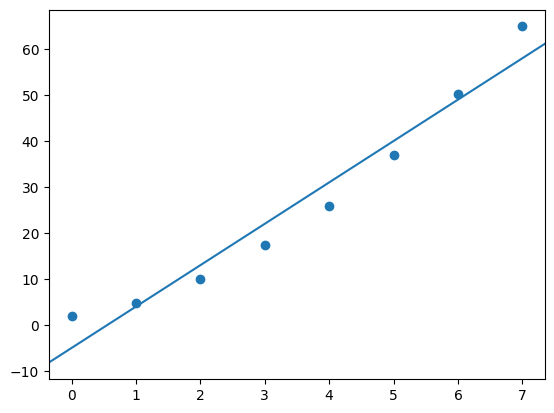

In [238]:
regression_plot(x, y, m, b)

In [239]:
m

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=9.009399>

In [240]:
b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-4.972377>

In [241]:
C

<tf.Tensor: shape=(), dtype=float32, numpy=20.817513>